In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('stocks_df.csv')   
df = pd.DataFrame(data, columns=['Date', 'Stock', 'Open', 'Close', 'Volume'])

stocks = df.groupby('Stock')
hdfcbank = stocks.get_group('HDFCBANK')

hdfcbank['Average'] = (hdfcbank['Open'] + hdfcbank['Close']) / 2
hdfcbank.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_12588\3980079986.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdfcbank['Average'] = (hdfcbank['Open'] + hdfcbank['Close']) / 2


,Date,Stock,Open,Close,Volume,Average
1489449,1995-06-15,HDFCBANK,4.59,4.54,1035000,4.565
1489450,1995-06-16,HDFCBANK,4.56,4.51,2123000,4.535
1489451,1995-06-19,HDFCBANK,4.51,4.51,899000,4.510
1489452,1995-06-20,HDFCBANK,4.51,4.49,1396000,4.500
1489453,1995-06-21,HDFCBANK,4.65,4.53,591000,4.590


In [4]:
avg =  np.asarray(hdfcbank['Average'])

DMA50 = np.array(avg)
sum50 = 0
for i in range(len(avg)):
    if (i - 50 >= 0):
        sum50 -= avg[i - 50]
    sum50 += avg[i]
    
    DMA50[i] = (sum50 / min(i + 1, 50))

hdfcbank['DMA50'] = DMA50.tolist()
hdfcbank.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_12588\132438288.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdfcbank['DMA50'] = DMA50.tolist()


,Date,Stock,Open,Close,Volume,Average,DMA50
1489449,1995-06-15,HDFCBANK,4.59,4.54,1035000,4.565,4.565000
1489450,1995-06-16,HDFCBANK,4.56,4.51,2123000,4.535,4.550000
1489451,1995-06-19,HDFCBANK,4.51,4.51,899000,4.510,4.536667
1489452,1995-06-20,HDFCBANK,4.51,4.49,1396000,4.500,4.527500
1489453,1995-06-21,HDFCBANK,4.65,4.53,591000,4.590,4.540000


In [5]:
DMA200 = np.array(avg)
sum200 = 0
for i in range(len(avg)):
    if (i - 200 >= 0):
        sum200 -= avg[i - 200]
    sum200 += avg[i]
    
    DMA200[i] = (sum200 / min(i + 1, 200))

hdfcbank['DMA200'] = DMA200.tolist()
hdfcbank.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_12588\2911593621.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdfcbank['DMA200'] = DMA200.tolist()


,Date,Stock,Open,Close,Volume,Average,DMA50,DMA200
1489449,1995-06-15,HDFCBANK,4.59,4.54,1035000,4.565,4.565000,4.565000
1489450,1995-06-16,HDFCBANK,4.56,4.51,2123000,4.535,4.550000,4.550000
1489451,1995-06-19,HDFCBANK,4.51,4.51,899000,4.510,4.536667,4.536667
1489452,1995-06-20,HDFCBANK,4.51,4.49,1396000,4.500,4.527500,4.527500
1489453,1995-06-21,HDFCBANK,4.65,4.53,591000,4.590,4.540000,4.540000


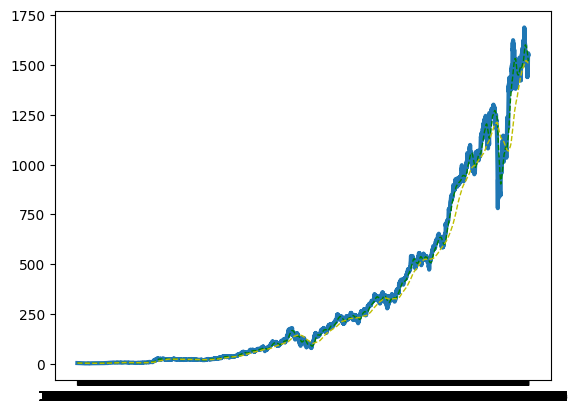

In [6]:
plt.plot(hdfcbank['Date'], hdfcbank['Average'], linewidth=3)
plt.plot(hdfcbank['Date'], hdfcbank['DMA50'], 'g--', linewidth=1)
plt.plot(hdfcbank['Date'], hdfcbank['DMA200'], 'y--' , linewidth=1)

plt.show()

In [7]:
hdfcbank.tail()

,Date,Stock,Open,Close,Volume,Average,DMA50,DMA200
1496054,2022-01-05,HDFCBANK,1536.80,1564.85,7166319,1550.825,1524.9690,1510.674625
1496055,2022-01-06,HDFCBANK,1543.00,1539.75,4814465,1541.375,1522.7690,1510.832500
1496056,2022-01-07,HDFCBANK,1544.00,1550.55,5589692,1547.275,1520.7590,1511.062000
1496057,2022-01-10,HDFCBANK,1558.00,1559.15,4428248,1558.575,1519.4945,1511.398625
1496058,2022-01-11,HDFCBANK,1561.95,1549.75,1150363,1555.850,1518.8830,1511.767750


In [8]:
x = hdfcbank.loc[hdfcbank['Date'] > '2021-01-01']
x.head()

,Date,Stock,Open,Close,Volume,Average,DMA50,DMA200
1495805,2021-01-04,HDFCBANK,1438.0,1416.00,7870096,1427.000,1359.6940,1106.835375
1495806,2021-01-05,HDFCBANK,1419.2,1426.70,7193412,1422.950,1363.4205,1108.992375
1495807,2021-01-06,HDFCBANK,1435.0,1420.55,11067025,1427.775,1367.1830,1111.476500
1495808,2021-01-07,HDFCBANK,1432.5,1416.25,9947421,1424.375,1371.2635,1114.242000
1495809,2021-01-08,HDFCBANK,1432.0,1431.65,6884382,1431.825,1375.3090,1117.006500


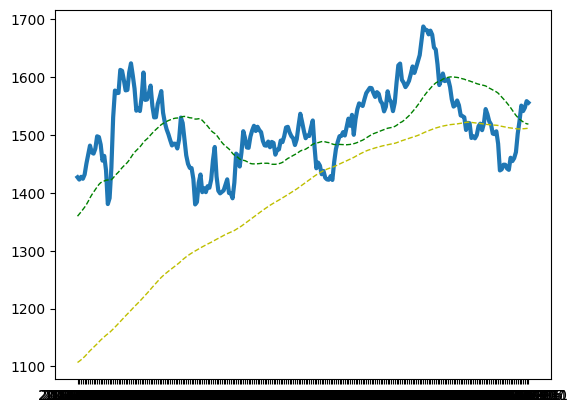

In [9]:
plt.plot(x['Date'], x['Average'], linewidth=3)
plt.plot(x['Date'], x['DMA50'], 'g--', linewidth=1)
plt.plot(x['Date'], x['DMA200'], 'y--' , linewidth=1)

plt.show()

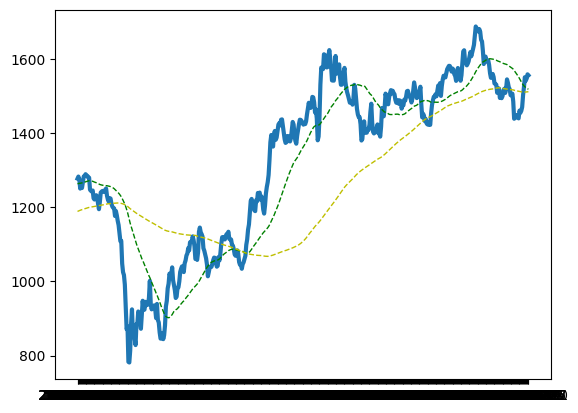

In [10]:
x = hdfcbank.loc[hdfcbank['Date'] >= '2020-01-01']

plt.plot(x['Date'], x['Average'], linewidth=3)
plt.plot(x['Date'], x['DMA50'], 'g--', linewidth=1)
plt.plot(x['Date'], x['DMA200'], 'y--' , linewidth=1)

plt.show()